In [1]:
!pip install -q scikit-learn imbalanced-learn matplotlib pandas seaborn xgboost

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_curve, auc
)
from imblearn.over_sampling import SMOTE
import joblib

DATA_PATH = "/mnt/data/creditcard.csv"
RANDOM_STATE = 42

In [3]:
import pandas as pd

df = pd.read_csv("creditcard.csv")
print("Shape:", df.shape)
display(df.head())
display(df.info())
display(df.describe().T)

Shape: (284807, 31)


Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

None

count          mean           std         min           25%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1      284807.0  1.168375e-15      1.958696  -56.407510     -0.920373   
V2      284807.0  3.416908e-16      1.651309  -72.715728     -0.598550   
V3      284807.0 -1.379537e-15      1.516255  -48.325589     -0.890365   
V4      284807.0  2.074095e-15      1.415869   -5.683171     -0.848640   
V5      284807.0  9.604066e-16      1.380247 -113.743307     -0.691597   
V6      284807.0  1.487313e-15      1.332271  -26.160506     -0.768296   
V7      284807.0 -5.556467e-16      1.237094  -43.557242     -0.554076   
V8      284807.0  1.213481e-16      1.194353  -73.216718     -0.208630   
V9      284807.0 -2.406331e-15      1.098632  -13.434066     -0.643098   
V10     284807.0  2.239053e-15      1.088850  -24.588262     -0.535426   
V11     284807.0  1.673327e-15      1.020713   -4.797473     -0.762494   
V12     284807.0 -1.247012e-15      0.999201  -18.683715     -0.405571   
V13     284807.0  8.190001e-16      0.995274   -5.791881     -0.648539   
V14     284807.0  1.207294e-15      0.958596  -19.214325     -0.425574   
V15     284807.0  4.887456e-15      0.915316   -4.498945     -0.582884   
V16     284807.0  1.437716e-15      0.876253  -14.129855     -0.468037   
V17     284807.0 -3.772171e-16      0.849337  -25.162799     -0.483748   
V18     284807.0  9.564149e-16      0.838176   -9.498746     -0.498850   
V19     284807.0  1.039917e-15      0.814041   -7.213527     -0.456299   
V20     284807.0  6.406204e-16      0.770925  -54.497720     -0.211721   
V21     284807.0  1.654067e-16      0.734524  -34.830382     -0.228395   
V22     284807.0 -3.568593e-16      0.725702  -10.933144     -0.542350   
V23     284807.0  2.578648e-16      0.624460  -44.807735     -0.161846   
V24     284807.0  4.473266e-15      0.605647   -2.836627     -0.354586   
V25     284807.0  5.340915e-16      0.521278  -10.295397     -0.317145   
V26     284807.0  1.683437e-15      0.482227   -2.604551     -0.326984   
V27     284807.0 -3.660091e-16      0.403632  -22.565679     -0.070840   
V28     284807.0 -1.227390e-16      0.330083  -15.430084     -0.052960   
Amount  284807.0  8.834962e+01    250.120109    0.000000      5.600000   
Class   284807.0  1.727486e-03      0.041527    0.000000      0.000000   

                 50%            75%            max  
Time    84692.000000  139320.500000  172792.000000  
V1          0.018109       1.315642       2.454930  
V2          0.065486       0.803724      22.057729  
V3          0.179846       1.027196       9.382558  
V4         -0.019847       0.743341      16.875344  
V5         -0.054336       0.611926      34.801666  
V6         -0.274187       0.398565      73.301626  
V7          0.040103       0.570436     120.589494  
V8          0.022358       0.327346      20.007208  
V9         -0.051429       0.597139      15.594995  
V10        -0.092917       0.453923      23.745136  
V11        -0.032757       0.739593      12.018913  
V12         0.140033       0.618238       7.848392  
V13        -0.013568       0.662505       7.126883  
V14         0.050601       0.493150      10.526766  
V15         0.048072       0.648821       8.877742  
V16         0.066413       0.523296      17.315112  
V17        -0.065676       0.399675       9.253526  
V18        -0.003636       0.500807       5.041069  
V19         0.003735       0.458949       5.591971  
V20        -0.062481       0.133041      39.420904  
V21        -0.029450       0.186377      27.202839  
V22         0.006782       0.528554      10.503090  
V23        -0.011193       0.147642      22.528412  
V24         0.040976       0.439527       4.584549  
V25         0.016594       0.350716       7.519589  
V26        -0.052139       0.240952       3.517346  
V27         0.001342       0.091045      31.612198  
V28         0.011244       0.078280      33.847808  
Amount     22.000000      77.165000   25691.160000  

In [4]:
# Missing values
print("Missing values per column:")
print(df.isnull().sum())

# Class distribution
print("\nClass counts:")
print(df['Class'].value_counts())
print("\nClass distribution (%):")
print((df['Class'].value_counts(normalize=True) * 100).round(4))

Missing values per column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Class counts:
Class
0    284315
1       492
Name: count, dtype: int64

Class distribution (%):
Class
0    99.8273
1     0.1727
Name: proportion, dtype: float64


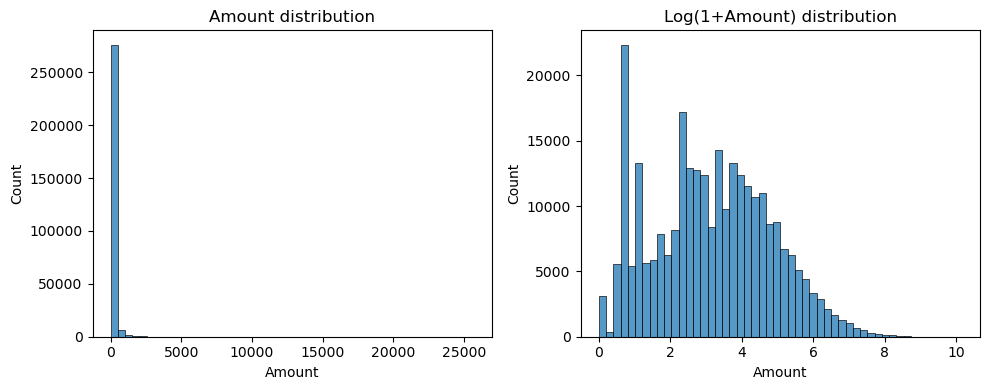

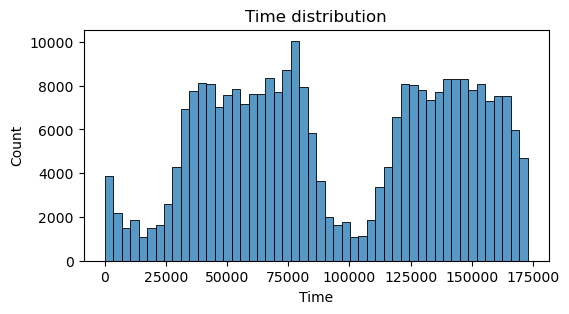

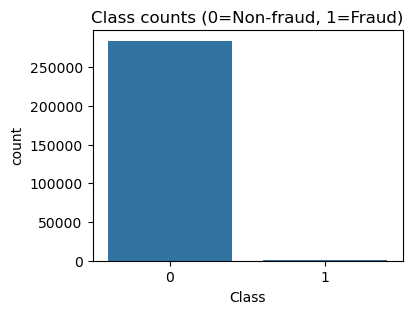

In [5]:
# Amount distribution (log scale view helps)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['Amount'], bins=50)
plt.title("Amount distribution")
plt.subplot(1,2,2)
sns.histplot(np.log1p(df['Amount']), bins=50)
plt.title("Log(1+Amount) distribution")
plt.tight_layout()
plt.show()

# Time distribution
plt.figure(figsize=(6,3))
sns.histplot(df['Time'], bins=50)
plt.title("Time distribution")
plt.show()

# Class bar
plt.figure(figsize=(4,3))
sns.countplot(x='Class', data=df)
plt.title("Class counts (0=Non-fraud, 1=Fraud)")
plt.show()

In [6]:
# Separate X and y
X = df.drop('Class', axis=1).copy()
y = df['Class'].copy()

# Scale Time and Amount
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

# Save scaler in the current working directory
joblib.dump(scaler, 'scaler_time_amount.joblib')
print("Scaler saved as scaler_time_amount.joblib")

# Show the updated X
print(X.head())

Scaler saved as scaler_time_amount.joblib
       Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -1.996583  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -1.996562 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -1.996562 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -1.996541 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V20       V21       V22       V23  \
0  0.239599  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474   
1 -0.078803  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.791461  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412   
3  0.237609  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321   
4  0.592941 -0.270533  0.817739  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25     

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=RANDOM_STATE, stratify=y
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train class distribution:\n", y_train.value_counts())

Train shape: (227845, 30) Test shape: (56962, 30)
Train class distribution:
 Class
0    227451
1       394
Name: count, dtype: int64


In [8]:
lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=RANDOM_STATE)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:,1]

print("Logistic Regression — classification report")
print(classification_report(y_test, y_pred_lr, digits=4))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))

Logistic Regression — classification report
              precision    recall  f1-score   support

           0     0.9999    0.9756    0.9876     56864
           1     0.0609    0.9184    0.1141        98

    accuracy                         0.9755     56962
   macro avg     0.5304    0.9470    0.5509     56962
weighted avg     0.9982    0.9755    0.9861     56962

ROC AUC: 0.9721669425367221


In [9]:
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=RANDOM_STATE, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

print("Random Forest — classification report")
print(classification_report(y_test, y_pred_rf, digits=4))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))

Random Forest — classification report
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56864
           1     0.9610    0.7551    0.8457        98

    accuracy                         0.9995     56962
   macro avg     0.9803    0.8775    0.9227     56962
weighted avg     0.9995    0.9995    0.9995     56962

ROC AUC: 0.9571890288895525


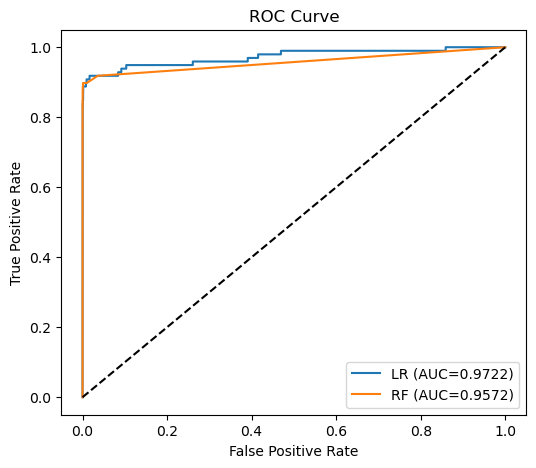

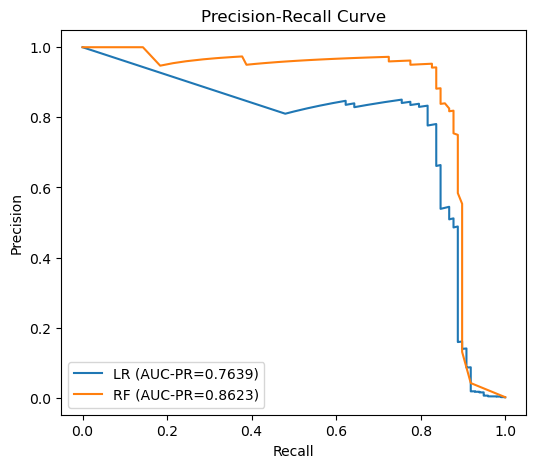

In [10]:
# ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr_lr, tpr_lr, label=f"LR (AUC={roc_auc_score(y_test,y_prob_lr):.4f})")
plt.plot(fpr_rf, tpr_rf, label=f"RF (AUC={roc_auc_score(y_test,y_prob_rf):.4f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Precision-Recall
prec_lr, rec_lr, _ = precision_recall_curve(y_test, y_prob_lr)
ap_lr = auc(rec_lr, prec_lr)
prec_rf, rec_rf, _ = precision_recall_curve(y_test, y_prob_rf)
ap_rf = auc(rec_rf, prec_rf)

plt.figure(figsize=(6,5))
plt.plot(rec_lr, prec_lr, label=f"LR (AUC-PR={ap_lr:.4f})")
plt.plot(rec_rf, prec_rf, label=f"RF (AUC-PR={ap_rf:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

RANDOM_STATE = 42 

sm = SMOTE(random_state=RANDOM_STATE)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
print("After SMOTE, counts:", np.bincount(y_train_sm))

rf_sm = RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE, n_jobs=-1)
rf_sm.fit(X_train_sm, y_train_sm)

y_pred_rf_sm = rf_sm.predict(X_test)
y_prob_rf_sm = rf_sm.predict_proba(X_test)[:, 1]

print("Random Forest after SMOTE — classification report:")
print(classification_report(y_test, y_pred_rf_sm, digits=4))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf_sm))


C:\Users\LOQ\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\LOQ\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\LOQ\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\LOQ\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^

After SMOTE, counts: [227451 227451]
Random Forest after SMOTE — classification report:
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9997     56864
           1     0.8632    0.8367    0.8497        98

    accuracy                         0.9995     56962
   macro avg     0.9314    0.9183    0.9247     56962
weighted avg     0.9995    0.9995    0.9995     56962

ROC AUC: 0.9753984264640014


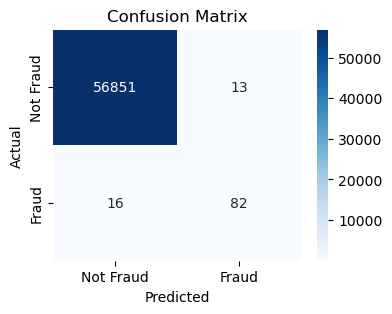

Top 10 features by importance:
V14 : 0.183722
V10 : 0.111426
V4 : 0.107697
V12 : 0.096527
V17 : 0.086023
V11 : 0.062094
V3 : 0.058454
V16 : 0.053111
V2 : 0.031257
V7 : 0.023408


In [12]:
# Choose the model you prefer (rf_sm recommended if it shows better recall/precision for fraud)
best_model = rf_sm

# Confusion matrix
cm = confusion_matrix(y_test, best_model.predict(X_test))
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud','Fraud'], yticklabels=['Not Fraud','Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Feature importances (top 10)
importances = best_model.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1][:10]
print("Top 10 features by importance:")
for i in indices:
    print(f"{feat_names[i]} : {importances[i]:.6f}")

In [14]:
joblib.dump(best_model, 'best_model_rf_sm.joblib')
print("Model saved as best_model_rf_sm.joblib")

Model saved as best_model_rf_sm.joblib


In [15]:
def predict_single(transaction_row):
    import joblib
    import pandas as pd

    scaler = joblib.load('scaler_time_amount.joblib')
    model = joblib.load('best_model_rf_sm.joblib')

    row_df = pd.DataFrame([transaction_row], columns=X.columns)
    row_df[['Time', 'Amount']] = scaler.transform(row_df[['Time', 'Amount']])
    
    prob = model.predict_proba(row_df)[:, 1][0]
    label = model.predict(row_df)[0]
    
    return {'label': int(label), 'probability_of_fraud': float(prob)}

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9991573329588147
Confusion Matrix:
 [[56851    13]
 [   35    63]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [17]:
import joblib

joblib.dump(model, 'creditcard_fraud_model.joblib')
print("Model saved as creditcard_fraud_model.joblib in the current folder")


Model saved as creditcard_fraud_model.joblib in the current folder


In [18]:
import numpy as np
import joblib
model = joblib.load('creditcard_fraud_model.joblib')
scaler = joblib.load('scaler_time_amount.joblib')

def predict_fraud(input_data):
    """
    input_data: list or array with 30 features, same order as X.columns
    Returns 0 (normal) or 1 (fraud)
    """
    input_array = np.array(input_data).reshape(1, -1)  # 2D array
    # Scale Time & Amount (
    time_index = 0       
    amount_index = -1   
    input_array[:, [time_index, amount_index]] = scaler.transform(
        input_array[:, [time_index, amount_index]]
    )

    prediction = model.predict(input_array)
    return prediction[0]

In [19]:
import streamlit as st
import numpy as np
import joblib

# Load model and scaler
model = joblib.load('creditcard_fraud_model.joblib')
scaler = joblib.load('scaler_time_amount.joblib')

st.title("Credit Card Fraud Detection App")

st.write("Enter the transaction details below:")

# Example inputs (you will add all 30 fields or essential ones)
time = st.number_input("Time (seconds)", value=0.0)
amount = st.number_input("Transaction Amount", value=0.0)

# Dummy values for V1-V28 (you can extend later)
features = [time] + [0]*28 + [amount]

if st.button("Predict"):
    input_array = np.array(features).reshape(1, -1)

2025-10-15 15:25:18.333 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 15:25:18.840 
  command:

    streamlit run C:\Users\LOQ\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-10-15 15:25:18.842 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 15:25:18.843 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 15:25:18.844 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 15:25:18.846 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 15:25:18.847 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 15:25:18.848 Thread 'MainThread': miss

In [20]:
import streamlit as st
import numpy as np
import joblib

model = joblib.load('creditcard_fraud_model.joblib')
scaler = joblib.load('scaler_time_amount.joblib')

st.title("Credit Card Fraud Detection App")
st.write("Enter transaction details to check if it's fraudulent.")

time = st.number_input("Time (seconds)", value=0.0)
amount = st.number_input("Transaction Amount", value=0.0)

v_features = []
for i in range(1, 29):
    v_features.append(st.number_input(f"V{i}", value=0.0))

features = [time] + v_features + [amount]

if st.button("Predict"):
    input_array = np.array(features).reshape(1, -1)

    time_index = 0
    amount_index = len(features) - 1

    input_array[:, [time_index, amount_index]] = scaler.transform(
        input_array[:, [time_index, amount_index]]
    )

    prediction = model.predict(input_array)[0]

    if prediction == 1:
        st.error(" Fraudulent Transaction Detected!")
    else:
        st.success("Transaction is Legitimate")

2025-10-15 15:25:26.022 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 15:25:26.023 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 15:25:26.024 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 15:25:26.025 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 15:25:26.026 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 15:25:26.027 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 15:25:26.027 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 15:25:26.028 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [21]:
!pip install streamlit

In [22]:
code = """
import streamlit as st
import numpy as np
import joblib

# Load model and scaler
model = joblib.load('creditcard_fraud_model.joblib')
scaler = joblib.load('scaler_time_amount.joblib')

st.title("Credit Card Fraud Detection App")
st.write("Enter transaction details to check if it is fraudulent.")

# Collect inputs
time = st.number_input("Time (seconds)", value=0.0)
amount = st.number_input("Transaction Amount", value=0.0)

# Placeholder inputs for V1–V28
v_features = []
for i in range(1, 29):
    v_features.append(st.number_input(f"V{i}", value=0.0))

# Combine inputs in correct order
features = [time] + v_features + [amount]

if st.button("Predict"):
    input_array = np.array(features).reshape(1, -1)

    # Index for scaling
    time_index = 0
    amount_index = len(features) - 1

    input_array[:, [time_index, amount_index]] = scaler.transform(
        input_array[:, [time_index, amount_index]]
    )

    prediction = model.predict(input_array)[0]

    if prediction == 1:
        st.error("Fraudulent Transaction Detected!")
    else:
        st.success("Transaction is Legitimate")
"""

# Save as app.py
with open('app.py', 'w', encoding='utf-8') as f:
    f.write(code)

print("app.py created successfully without emojis.")


app.py created successfully without emojis.


In [ ]:
!streamlit run app.py


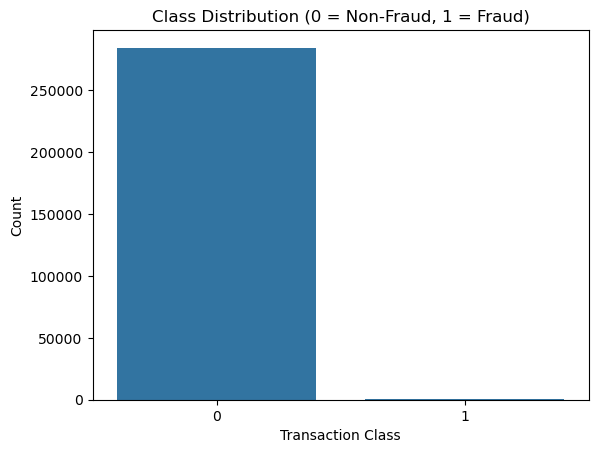

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0 = Non-Fraud, 1 = Fraud)')
plt.xlabel('Transaction Class')
plt.ylabel('Count')
plt.show()

In [24]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

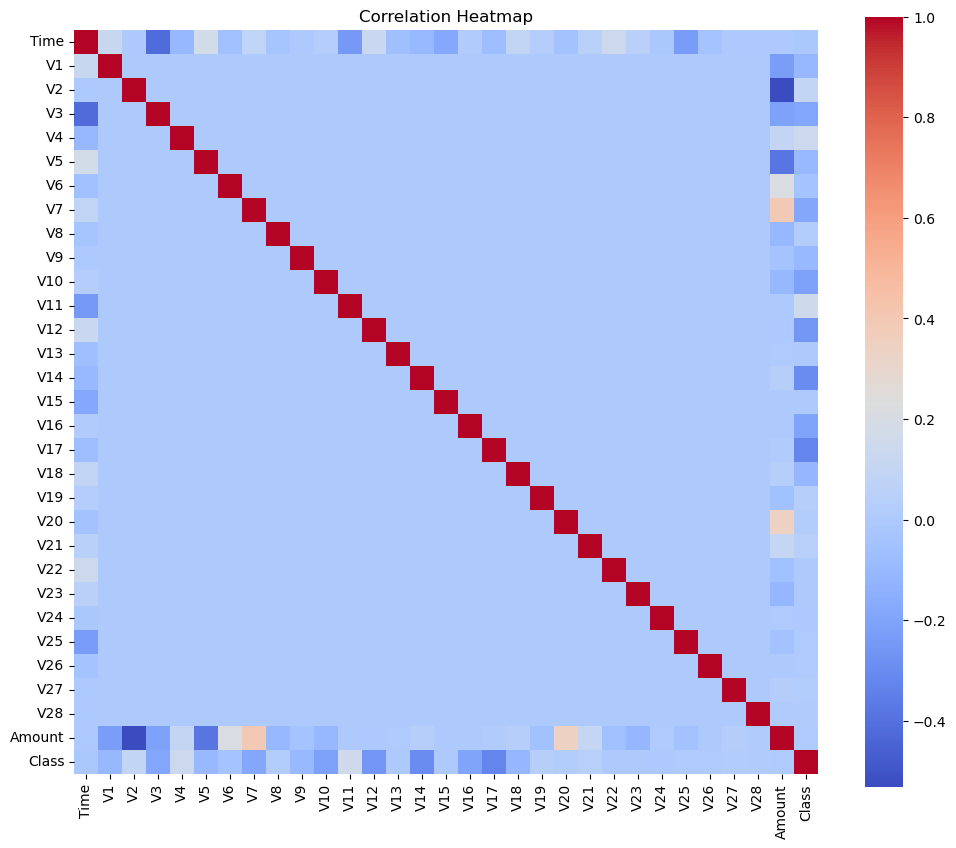

In [25]:
corr = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', vmax=1.0, square=True)
plt.title('Correlation Heatmap')
plt.show()

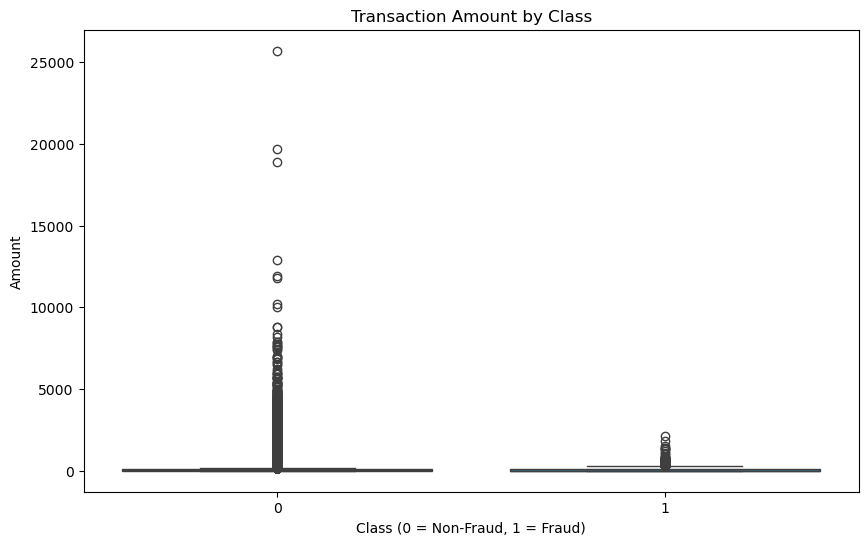

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount by Class')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Amount')
plt.show()

In [27]:
!pip install imbalanced-learn

In [28]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only on training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())

Before SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_train_resampled, y_train_resampled)

y_pred = model_smote.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[55406  1458]
 [    8    90]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [31]:
!pip install xgboost
from xgboost import XGBClassifier

In [32]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = {}

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": classification_report(y_test, y_pred, output_dict=True)['1']['precision'],
        "Recall": classification_report(y_test, y_pred, output_dict=True)['1']['recall'],
        "F1 Score": classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],
        "ROC AUC": roc_auc_score(y_test, y_pred)
    }

C:\Users\LOQ\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:37:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [33]:
import pandas as pd

results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="Recall", ascending=False)
display(results_df)

Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression  0.974264   0.058140  0.918367  0.109356  0.946364
XGBoost              0.999245   0.731092  0.887755  0.801843  0.943596
Random Forest        0.999456   0.845361  0.836735  0.841026  0.918235
Decision Tree        0.997033   0.340807  0.775510  0.473520  0.886463

In [34]:
import joblib

# Save your final model
joblib.dump(rf_sm, 'creditcard_fraud_model.joblib')
print("Final model saved as creditcard_fraud_model.joblib")


Final model saved as creditcard_fraud_model.joblib


In [35]:
joblib.dump(scaler, 'scaler_time_amount.joblib')
print("Scaler saved as scaler_time_amount.joblib")


Scaler saved as scaler_time_amount.joblib


In [36]:
model = joblib.load('creditcard_fraud_model.joblib')
scaler = joblib.load('scaler_time_amount.joblib')

In [ ]:
!streamlit run app.py